# Team 2

- Michael Tomilov
- Roman Romanov
- Yura Khaltin

# Data Read

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [141]:
df_train = pd.read_csv('all/train.csv', sep=',', encoding='utf8')

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [143]:
df_train.shape

(24712, 22)

In [144]:
df_test = pd.read_csv('all/test.csv', sep=',', encoding='utf8')

In [145]:
df_test.shape

(16476, 21)

In [146]:
df_train.head().T

,0,1,2,3,4
_id,df7489733b004bbe40d3d37b34f82419,905a0b9a5456ee962223033473666be3,02d69c07ec6d68e31d641edd45ce61cd,e492fbe0cccaf67cdb5c0944dbc8a167,ac2dc6f5835bdea8e71dd99b65208d07
age,54,36,53,34,29
job,technician,services,blue-collar,blue-collar,services
marital,married,single,married,married,single
education,professional.course,basic.4y,basic.4y,basic.9y,university.degree
default,unknown,no,no,no,no
housing,no,no,yes,yes,yes
loan,no,no,no,yes,no
contact,cellular,telephone,cellular,telephone,telephone
month,aug,may,aug,may,aug


In [147]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
#         print(list(set(df_train[i]))[:100]) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print(df_train[i].value_counts())
        print('\n') # выводим пустую строку

_id
b728cbd063992366b91ff4c228c85b9b    1
46bf1d17152eb636b1386738dcd5c2c7    1
cfa8f73081a147ffb86ce1889fdeb786    1
0ca32652f635092791624694c5315db8    1
fc493402b8b810641400005b2ddfdcd8    1
a28f713a55743a69a717ad5923a03371    1
1bc5cc2b826ecbe87649ccf1eb61ffd4    1
30bc003031e41ef7576ff79da23b9f28    1
4ce1b075fd4b0d2ff2a4207421ac6d15    1
84328fd288f0672f9b17fec4892685d8    1
339a5a70d20da5c1f723699f62f4764f    1
bed24ecd4124e98dd0e83ad3efb02419    1
d7853e68109737be2afc2400b2b8add2    1
d29f090f28015d26a2e3f637e5411ee8    1
f048224a14d884c8946397ce96e42acb    1
5a6d027c5cf64bc15f6de5bd51fe65ce    1
d2c0b9c305eff0e2060720fb55e7781c    1
ced5b2988a617d0aac0ad466f6a3bca5    1
ad86bcf927baf6a9bacfd2604e9c32cb    1
6a5e0c052d827f7739ccbfa943f873c5    1
7912f2211a2f4f0508036c48892339ac    1
1ad3d21a7a5ac1e505fdbeeff86b7296    1
e2ecd00756d153e59799e88011b12a01    1
61338c92cb316d9ce7d70fdfccba5e8f    1
b9501ad1035cfc3ac0b7a6789fd35ff9    1
b9913e9239b98e4e592decd767bbb81c    1
90ad10d7

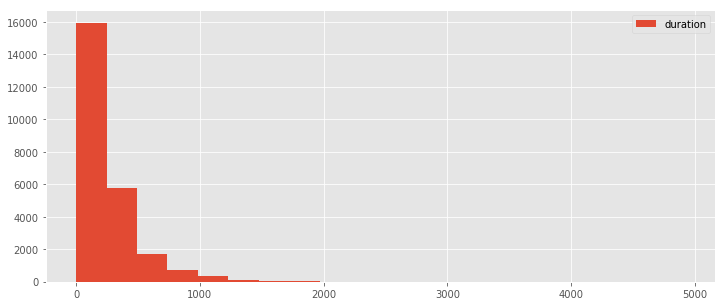

In [148]:
df_train['duration'].hist(label='duration', bins=20)
plt.legend()

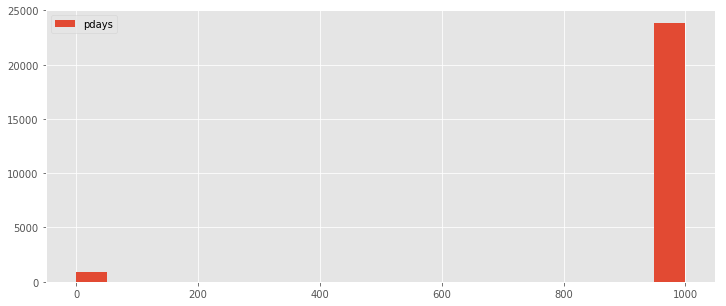

In [149]:
df_train['pdays'].hist(label='pdays', bins=20)
plt.legend()

In [150]:
df.shape

(24667, 22)

# Data Preprocessing

In [199]:
def preproc_data(df_input):
    df = df_input.copy()
    
    df = df.drop('_id', axis=1)
    categorical = df.select_dtypes(include=['object', 'category']).columns
#     for cat in categorical:
#         df.loc[df[cat] == 'unknown', cat] = df[cat].value_counts().idxmax()
    df = pd.get_dummies(df, columns=categorical)
    
    return df

In [200]:
df_train_preproc = df_train.pipe(preproc_data)

In [201]:
df_test_preproc = df_test.pipe(preproc_data)

In [202]:
df_train_preproc.shape

(24712, 64)

In [203]:
df_test_preproc.shape

(16476, 63)

In [204]:
y = df_train_preproc['target']
X = df_train_preproc.drop('target', axis=1)
X_final_test = df_test_preproc

In [205]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree

In [206]:
from scipy.stats import randint as randint
from scipy.stats import uniform

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 456

In [207]:
tree_model = DecisionTreeClassifier(random_state=RND_SEED, presort=True)
tree_params = {
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 10),
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'class_weight': [None, 'balanced'],
}

cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)
tree_search = RandomizedSearchCV(tree_model, param_distributions=tree_params, n_iter=200, n_jobs=-1,
                                             cv=cv, scoring='roc_auc', random_state=RND_SEED, verbose=True)
tree_search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=456, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=456,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'max_features': [None, 'auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ed88b0908>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ed88b0b38>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6ed88b0ba8>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', ra

In [189]:
tree_search.best_score_

0.9334362143329752

In [190]:
tree_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=6, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=9, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=True, random_state=456,
            splitter='best')

In [191]:
tree_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 9,
 'min_samples_split': 7}

In [250]:
tree_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7}

# KNN 

In [30]:
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': range(5, 11),
#     'leaf_size': range(1, 5),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto'],
}

cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)
knn_search = GridSearchCV(knn_model, param_grid=knn_params, n_jobs=-1,
                                     cv=cv, scoring='roc_auc', verbose=True)
knn_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=456, shuffle=True),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': range(5, 11), 'knn__weights': ['uniform', 'distance'], 'knn__algorithm': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [31]:
knn_search.best_params_

{'knn__algorithm': 'auto', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}

In [32]:
knn_search.best_score_

0.8202910333662392

# Logistic Regression

In [164]:
from sklearn.metrics import roc_auc_score
logistic_model_basic = LogisticRegression()
logistic_model_basic.fit(X_train, y_train)
y_hat = logistic_model_basic.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_hat)

0.9338144725566324

In [35]:
logistic_model = LogisticRegression()
logistic_params = {
    'penalty': ['l1','l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    'C': [0.1, 1, 10]
}

cv = StratifiedKFold(n_splits=5, random_state=RND_SEED, shuffle=True)
logistic_search = GridSearchCV(logistic_model, param_grid=logistic_params, n_jobs=-1,
                                               cv=cv, scoring='roc_auc', verbose=True)
logistic_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=456, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=True)

In [36]:
logistic_search.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [37]:
logistic_search.best_score_

0.9325113398854862

In [38]:
logistic_search.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Model Comparison

In [192]:
best_models = [
    tree_search.best_estimator_,
#     knn_search.best_estimator_,
#     logistic_search.best_estimator_,
    logistic_model_basic
]
best_y_hats = [model.predict_proba(X_test)[:, 1] for model in best_models]

ValueError: X has 63 features per sample; expecting 57

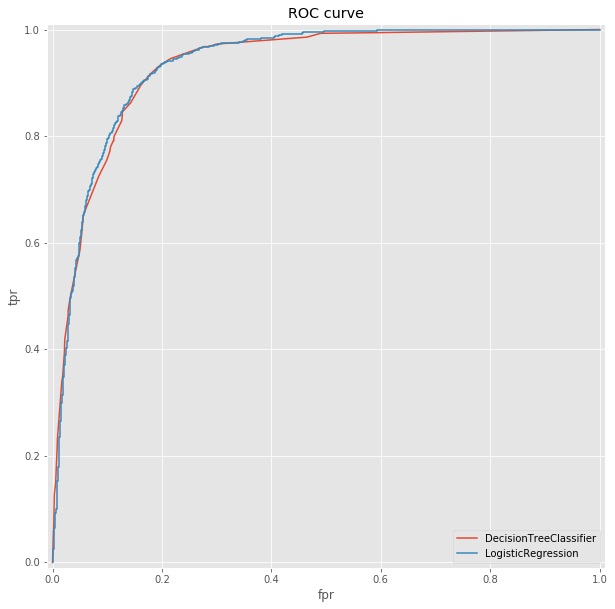

In [211]:
from sklearn.metrics import roc_auc_score, roc_curve
plt.figure(figsize=(10, 10), facecolor='white')

for model, y_hat in zip(best_models, best_y_hats):
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    plt.plot(fpr, tpr)

plt.grid(True)
plt.title('ROC curve')
plt.legend([model.__class__.__name__ for model in best_models])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
pass

In [212]:
for model, y_hat in zip(best_models, best_y_hats):
    print('model = {}'.format(model.__class__.__name__))
    print('roc:', roc_auc_score(y_test, y_hat))
    print()

model = DecisionTreeClassifier
roc: 0.931264535767986

model = LogisticRegression
roc: 0.9338144725566324



# Prediction

In [217]:
final_ids = df_test._id

In [218]:
y_final_hat = tree_search.best_estimator_.predict(X_final_test)

In [219]:
df_predict = pd.DataFrame({'_id': final_ids, 'target': y_final_hat})

In [220]:
df_predict.to_csv('hw3.csv', sep=',', encoding='utf8', index=False)